<h1 style="color:darkblue; text-align:center; font-family:Arial, Helvetica, sans-serif; font-size:48px; font-weight:bold; text-shadow: 2px 2px 4px gray;">
Threat vs Hope — NASA Space Data Story
</h1>

<p style="color:black; font-size:16px; font-family:Georgia; text-align:justify;">
Space does not send a single, simple message. One side of the universe throws rocks past Earth, some of them skimming close enough to remind us how small and fragile our world is. The other side quietly hides distant planets that might one day feel like a second home, orbiting faraway stars we can barely see.
</p>

<p style="color:black; font-size:16px; font-family:Georgia; text-align:justify;">
In this notebook, both sides are introduced: the first part shows Near-Earth Objects (NEOs), highlighting how many dangerous rocks are out there, how large they are, and how close they come to Earth. The second part explores Exoplanets (Hope), where each row represents a distant planet with radius, temperature, and other properties that hint at how Earth-like it might be.
</p>


![Alt Text](NASA.png)


<h2 style="color:darkblue; font-family:Verdana;">
Story Objectives
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia; text-align:justify;">
<b>Two datasets, two faces of space:</b>
</p>
<ul style="font-family:Georgia;">
<li><b>NEO (Threat):</b> Each row is an asteroid that approached Earth, with size, close-approach distance, and a hazardous flag. Together, they map the background level of danger in our cosmic neighborhood.</li>
<li><b>Exoplanets (Hope):</b> Each row is a candidate planet with radius, temperature, and other properties that hint at how Earth-like it might be.</li>
</ul>

<p style="font-family:Georgia; text-align:justify;">
After introducing both datasets, this notebook focuses on exploring and understanding their key features. The main objectives are:
</p>
<ul style="font-family:Georgia;">
<li>Perform an initial exploration of each dataset: examine shapes, data types, missing values, and basic distributions.</li>
<li>Clean and standardize the data to ensure numeric columns, proper types, and handle missing or inconsistent values.</li>
<li>Create derived metrics or scores that highlight important characteristics (e.g., <code>threat_score</code> for NEOs, habitability indicators for exoplanets).</li>
<li>Summarize and group data by relevant categories to extract meaningful patterns or trends.</li>
<li>Visualize key distributions, relationships, and comparisons with clear titles, labels, and color coding.</li>
<li>Highlight insights that tell a clear story about potential dangers from NEOs and promising features of exoplanets.</li>
</ul>


<h2 style="color:darkblue; font-family:Verdana;">
0. Setup
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Import the required libraries and load the datasets.
</p>


In [20]:
# Standard libraries
import requests
import pandas as pd
import numpy as np
import math
from pathlib import Path
import json
from datetime import datetime
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, confusion_matrix, classification_report, 
                                roc_curve, auc, precision_recall_curve)
from sklearn.preprocessing import label_binarize
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_columns", 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set(style="whitegrid")
print("✓ All libraries imported successfully")

✓ All libraries imported successfully


In [1]:
# Load datasets (adjust paths if needed)
neo = pd.read_csv("datasets/neo.csv")
#exo = pd.read_csv("datasets/nasa-exoplanet-archive.csv")  

neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


<h1 style="color:crimson; text-align:center; font-family:Verdana; font-size:36px; line-height:1.2;">
⚠️ Near-Earth Rocks: Tracking Earth's Cosmic Visitors ⚠️
</h1>


![Alt Text](NEO.png)

<h2 style="color:darkblue; font-family:Verdana;">
1. EDA — Exploring the NEO Dataset
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Let's explore the NEO dataset structure, data types, and basic statistics before defining any threat metrics.
</p>

In [2]:
# Display basic information about the NEO dataset
print("=" * 60)
print("DATASET SHAPE (NEO)")
print("=" * 60)
print(f"Rows: {neo.shape[0]:,}")
print(f"Columns: {neo.shape[1]}")
print()

print("=" * 60)
print("FIRST FEW ROWS")
print("=" * 60)
neo.head(10)

DATASET SHAPE (NEO)
Rows: 90,836
Columns: 10

FIRST FEW ROWS


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [3]:
# Data types and basic info
print("=" * 60)
print("DATA TYPES AND INFO (NEO)")
print("=" * 60)
print(neo.dtypes)
print()
print(neo.info())

DATA TYPES AND INFO (NEO)
id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazard

In [4]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES (NEO)")
print("=" * 60)
missing = neo.isnull().sum()
missing_pct = (missing / len(neo)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in NEO dataset!")

MISSING VALUES (NEO)
No missing values found in NEO dataset!


In [5]:
# Basic statistics for numerical columns
print("=" * 60)
print("NUMERICAL SUMMARY STATISTICS (NEO)")
print("=" * 60)
neo.describe().T

NUMERICAL SUMMARY STATISTICS (NEO)


,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


<p style="font-family:Georgia; text-align:justify;">
This quick EDA reveals how many close approaches are recorded, which columns are reliable, and the overall scale of asteroid sizes and distances. It sets the stage for defining a threat score and focusing on the most concerning objects.
</p>


<h2 style="color:darkblue; font-family:Verdana;">
2. Data Cleaning
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Clean and prepare the NEO dataset by converting key columns to numeric, filling missing values, standardizing hazard flags, and keeping extreme outliers for analysis of the most threatening asteroids.</p>


In [6]:
# Create a copy for cleaning
neo_clean = neo.copy()

print("Starting NEO data cleaning process...")
print(f"Original shape: {neo_clean.shape}")

Starting NEO data cleaning process...
Original shape: (90836, 10)


In [7]:
# Check and remove duplicate rows
print("=" * 60)
print("DUPLICATE ROWS (NEO - CLEAN)")
print("=" * 60)

dup_count = neo_clean.duplicated().sum()
print(f"Duplicate rows: {dup_count:,}")

if dup_count > 0:
    neo_clean = neo_clean.drop_duplicates()
    print(f"Removed {dup_count:,} duplicates")
    print(f"New shape: {neo_clean.shape}")

print()


DUPLICATE ROWS (NEO - CLEAN)
Duplicate rows: 0



In [8]:
# ----------------------------
# Unique values check
# ----------------------------
print("\n" + "="*60)
print("UNIQUE VALUES CHECK (NEO CLEAN DATA)")
print("="*60 + "\n")

for col in ["id", "name", "orbiting_body", "hazardous", "size_category"]:
    if col in neo_clean.columns:
        unique_vals = neo_clean[col].nunique()
        print(f"{col}: {unique_vals:,} unique values")
        # opsionale: shfaq 5 të parët
        print(f"   Example values: {neo_clean[col].unique()[:5]}\n")

print("="*70 + "\n")



UNIQUE VALUES CHECK (NEO CLEAN DATA)

id: 27,423 unique values
   Example values: [2162635 2277475 2512244 3596030 3667127]

name: 27,423 unique values
   Example values: ['162635 (2000 SS164)' '277475 (2005 WK4)' '512244 (2015 YE18)'
 '(2012 BV13)' '(2014 GE35)']

orbiting_body: 1 unique values
   Example values: ['Earth']

hazardous: 2 unique values
   Example values: [False  True]




In [9]:
# Ensure numeric types for key columns
numeric_cols = ["estimated_diameter_max", "miss_distance_km", "relative_velocity_km_s"]
for col in numeric_cols:
    if col in neo_clean.columns:
        neo_clean[col] = pd.to_numeric(neo_clean[col], errors="coerce")

# Handle missing values in threat-related columns
for col in ["estimated_diameter_max", "miss_distance_km"]:
    if col in neo_clean.columns:
        if neo_clean[col].isnull().sum() > 0:
            print(f"Filling missing values in {col} with median")
            neo_clean[col] = neo_clean[col].fillna(neo_clean[col].median())

# Convert hazard flag to boolean/category
if "is_potentially_hazardous_asteroid" in neo_clean.columns:
    neo_clean["is_potentially_hazardous_asteroid"] = neo_clean[
        "is_potentially_hazardous_asteroid"
    ].astype("bool")
    print("Converted is_potentially_hazardous_asteroid to bool")

print("\nData types after cleaning:")
print(neo_clean.dtypes.head(15))


Data types after cleaning:
id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object


In [10]:
# ----------------------------
# Outlier check with IQR method
# ----------------------------
print("\n" + "="*60)
print("OUTLIER CHECK (IQR METHOD)")
print("="*60 + "\n")

# List of numeric columns to check for outliers
num_cols = [
    "estdiametermin",
    "estdiametermax",
    "relativevelocity",
    "missdistance",
    "absolutemagnitude"
]

outlier_info = []

for col in num_cols:
    if col in neo_clean.columns:
        Q1 = neo_clean[col].quantile(0.25)
        Q3 = neo_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask = (neo_clean[col] < lower) | (neo_clean[col] > upper)
        count = mask.sum()
        pct = (count / len(neo_clean)) * 100
        outlier_info.append((col, count, pct))
        print(f"{col}: {count:,} outliers ({pct:.2f}%)")

print("\nNote: Outliers are kept in the dataset because extreme values")
print("can represent the most interesting NEOs (very large or very close).")
print(f"\nFINAL CLEAN DATA SHAPE: {neo_clean.shape}\n")



OUTLIER CHECK (IQR METHOD)


Note: Outliers are kept in the dataset because extreme values
can represent the most interesting NEOs (very large or very close).

FINAL CLEAN DATA SHAPE: (90836, 10)



<h2 style="color:darkblue; font-family:Verdana;">
2. Data Transformation 
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Transform the cleaned NEO dataset by creating a <code>threat_score</code>, categorizing asteroids by size and distance, flagging big and/or close hazards, and summarizing potentially dangerous objects.</p>


In [11]:
# ----------------------------
# Threat Score and Hazardous Asteroids
# ----------------------------

# Convert 'miss_distance' to float to ensure numeric operations
neo_clean["miss_distance"] = neo_clean["miss_distance"].astype(float)

# Calculate 'threat_score' as asteroid size divided by miss distance
# Higher values indicate potentially more dangerous objects
neo_clean["threat_score"] = neo_clean["est_diameter_max"] / neo_clean["miss_distance"]

# Filter only the potentially hazardous asteroids
# 'hazardous' column is assumed to be boolean (True/False)
dangerous_asteroids = neo_clean[neo_clean["hazardous"] == True]

# Display a sample of the dangerous asteroids
print("=" * 60)
print("DANGEROUS ASTEROIDS (SAMPLE)")
print("=" * 60)
dangerous_asteroids.head(10)  # Show first 10 rows for quick inspection


DANGEROUS ASTEROIDS (SAMPLE)


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,threat_score
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,9.673909e-09
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,1.232220e-08
10,54049873,(2020 OT6),0.252671,0.564989,58430.697200,3.833750e+07,Earth,False,20.11,True,1.473724e-08
23,2506491,506491 (2003 UW29),0.201630,0.450858,115899.180498,1.510102e+07,Earth,False,20.60,True,2.985615e-08
27,3781344,(2017 RV),0.110804,0.247765,48655.305132,3.279775e+07,Earth,False,21.90,True,7.554330e-09
32,2020425,20425 (1998 VD35),0.221083,0.494356,40625.288951,1.489180e+07,Earth,False,20.40,True,3.319653e-08
39,2003362,3362 Khufu (1984 QA),0.581507,1.300289,37279.210933,3.253063e+07,Earth,False,18.30,True,3.997123e-08
46,3463175,(2009 LW2),0.305179,0.682402,67427.241331,1.009472e+07,Earth,False,19.70,True,6.759983e-08
47,3572706,(2011 OB),0.366906,0.820427,93603.438892,7.148808e+07,Earth,False,19.30,True,1.147642e-08
50,3986682,(2020 AN3),0.211132,0.472106,61503.174838,2.025234e+07,Earth,False,20.50,True,2.331120e-08


<p style="font-family:Georgia; text-align:justify;">
Each asteroid now carries a <code>threat_score</code> that rises when the object is both large and close. Filtering to rows marked as potentially hazardous gives the core cast of dangerous NEOs that will drive the visual story.
</p>


In [12]:
# ----------------------------
# Categorize Asteroids by Size 
# ----------------------------
print("SIZE CATEGORIES (based on max diameter)")

# Pick the right diameter column name
if "est_diameter_max" in neo_clean.columns:
    size_col = "est_diameter_max"
else:
    size_col = "estdiametermax"

# Define bins (7 edges → 6 intervals)
size_bins = [0, 0.05, 0.1, 0.5, 1, 5, 50]  # km

# Define 6 labels for 6 intervals
size_labels = ["Tiny", "Very Small", "Small", "Medium", "Large", "Very Large"]

# Categorize each asteroid by size
neo_clean["size_category"] = pd.cut(
    neo_clean[size_col],
    bins=size_bins,
    labels=size_labels,
    right=False
)

# Display the counts of asteroids in each size category
print(neo_clean["size_category"].value_counts().sort_index())
print()

SIZE CATEGORIES (based on max diameter)
size_category
Tiny          26401
Very Small    17484
Small         32996
Medium         9023
Large          4775
Very Large      153
Name: count, dtype: int64



In [13]:
# ----------------------------
# Categorize Asteroids by Miss Distance (Distance Risk)
# ----------------------------
print("DISTANCE RISK CATEGORIES (based on miss distance)")

# Determine the correct distance column
if "miss_distance" in neo_clean.columns:
    dist_col = "miss_distance"
else:
    dist_col = "missdistance"

# Define distance bins in km (edges)
# 5 edges → 4 intervals, so we need 4 labels
dist_bins = [0, 1e7, 3e7, 5e7, 1e8]  # e.g., 10M, 30M, 50M, 100M km

# Labels for each distance interval (must be 4 labels for 4 intervals)
dist_labels = ["Extremely Close", "Very Close", "Close", "Moderate"]

# Categorize asteroids by miss distance
neo_clean["distance_risk"] = pd.cut(
    neo_clean[dist_col],
    bins=dist_bins,
    labels=dist_labels,
    right=False
)

# Display counts for each distance risk category
print(neo_clean["distance_risk"].value_counts().sort_index())
print()


DISTANCE RISK CATEGORIES (based on miss distance)
distance_risk
Extremely Close    14983
Very Close         21359
Close              23874
Moderate           30620
Name: count, dtype: int64



In [14]:
# ----------------------------
# Derived Threat Flags
# ----------------------------
print("DERIVED THREAT FLAGS")

# Column indicating whether an asteroid is potentially hazardous
haz_col = "hazardous"  # adjust if your column name differs

# ----------------------------
# "Big" threat: diameter > 0.5 km AND hazardous
# ----------------------------
neo_clean["is_big_threat"] = (neo_clean[size_col] > 0.5) & (neo_clean[haz_col])

# ----------------------------
# "Close" threat: miss distance < 30 million km AND hazardous
# ----------------------------
neo_clean["is_close_threat"] = (neo_clean[dist_col] < 3e7) & (neo_clean[haz_col])

# ----------------------------
# "Double" threat: both big AND close
# ----------------------------
neo_clean["is_double_threat"] = neo_clean["is_big_threat"] & neo_clean["is_close_threat"]

# ----------------------------
# Display counts for each threat type
# ----------------------------
print(f"Big threats: {neo_clean['is_big_threat'].sum():,}")
print(f"Close threats: {neo_clean['is_close_threat'].sum():,}")
print(f"Double threats: {neo_clean['is_double_threat'].sum():,}")
print()


DERIVED THREAT FLAGS
Big threats: 3,814
Close threats: 3,124
Double threats: 1,259



In [15]:
# ----------------------------
# Display Hazardous Asteroids Sorted by Threat Score
# ----------------------------
print("HAZARDOUS ASTEROIDS (SAMPLE BY THREAT SCORE)")

# Filter only hazardous asteroids and sort by threat_score descending
dangerous_asteroids = (
    neo_clean[neo_clean[haz_col] == True]  # keep only hazardous asteroids
    .sort_values("threat_score", ascending=False)  # sort highest threat first
)

# Print total number of hazardous NEOs
print(f"Number of hazardous NEOs: {len(dangerous_asteroids):,}")
print()

# Display top 10 hazardous asteroids by threat_score
dangerous_asteroids.head(10)


HAZARDOUS ASTEROIDS (SAMPLE BY THREAT SCORE)
Number of hazardous NEOs: 8,840



,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,threat_score,size_category,distance_risk,is_big_threat,is_close_threat,is_double_threat
11227,2004179,4179 Toutatis (1989 AC),2.304385,5.152761,39593.866575,1.549414e+06,Earth,False,15.31,True,3.325619e-06,Very Large,Extremely Close,True,True,True
2472,3789399,(2017 VW13),0.192555,0.430566,40792.770407,1.432727e+05,Earth,False,20.70,True,3.005222e-06,Small,Extremely Close,False,True,False
17142,3263453,(2004 XP14),0.350393,0.783502,62664.322585,4.324384e+05,Earth,False,19.40,True,1.811823e-06,Medium,Extremely Close,True,True,True
4802,3131063,(2002 NY40),0.421265,0.941976,75226.687788,5.269744e+05,Earth,False,19.00,True,1.787518e-06,Medium,Extremely Close,True,True,True
17150,2612901,612901 (2004 XP14),0.291444,0.651688,62664.322601,4.324384e+05,Earth,False,19.80,True,1.507009e-06,Medium,Extremely Close,True,True,True
88471,2007482,7482 (1994 PC1),1.283970,2.871045,70399.646291,1.981474e+06,Earth,False,16.58,True,1.448944e-06,Large,Extremely Close,True,True,True
48890,2003122,3122 Florence (1981 ET3),4.135757,9.247833,48724.636424,7.066521e+06,Earth,False,14.04,True,1.308683e-06,Very Large,Extremely Close,True,True,True
16117,2023187,23187 (2000 PN9),1.669379,3.732845,112710.925234,3.043004e+06,Earth,False,16.01,True,1.226697e-06,Large,Extremely Close,True,True,True
69807,3729835,(2015 TB145),0.260949,0.583499,125807.719190,4.868071e+05,Earth,False,20.04,True,1.198624e-06,Medium,Extremely Close,True,True,True
22593,3388315,(2007 TU24),0.231502,0.517654,33294.250592,5.541688e+05,Earth,False,20.30,True,9.341098e-07,Medium,Extremely Close,True,True,True


In [16]:
# ----------------------------
# Summary by Hazard Flag and Size Category
# ----------------------------
print("SUMMARY BY HAZARD FLAG AND SIZE CATEGORY")

# Group the dataset by:
# 1. Hazardous flag (haz_col) → True/False
# 2. Size category → Tiny, Very Small, Small, etc.
summary = (
    neo_clean
    .groupby([haz_col, "size_category"], observed=True)  # observed=True avoids including unused categories
    .agg(
        # Count of asteroids in each group
        # If 'id' exists, count by 'id', else use 'threat_score'
        count=("id", "count") if "id" in neo_clean.columns else ("threat_score", "count"),
        # Average threat score per group
        mean_threat=("threat_score", "mean"),
        # Maximum threat score per group
        max_threat=("threat_score", "max")
    )
    .round(6)  # round numeric results to 6 decimal places for readability
)

# Print the grouped summary
print(summary)

# Print final number of columns in the cleaned dataset
print("\nFINAL NUMBER OF COLUMNS IN neo_clean:", len(neo_clean.columns))


SUMMARY BY HAZARD FLAG AND SIZE CATEGORY
                         count  mean_threat  max_threat
hazardous size_category                                
False     Tiny           26401          0.0    0.000002
          Very Small     17484          0.0    0.000003
          Small          27970          0.0    0.000002
          Medium          6465          0.0    0.000000
          Large           3558          0.0    0.000000
          Very Large       114          0.0    0.000001
True      Small           5026          0.0    0.000003
          Medium          2558          0.0    0.000002
          Large           1217          0.0    0.000001
          Very Large        39          0.0    0.000003

FINAL NUMBER OF COLUMNS IN neo_clean: 16


<h2 style="color:darkblue; font-family:Verdana;">
4. Visualizing the Threat
</h2>
<hr style="border:1px solid darkblue;"/>

<p style="font-family:Georgia;">
Now we turn the transformed NEO data into graphs that show how many asteroids exist in each size category and what fraction of them are hazardous.</p>


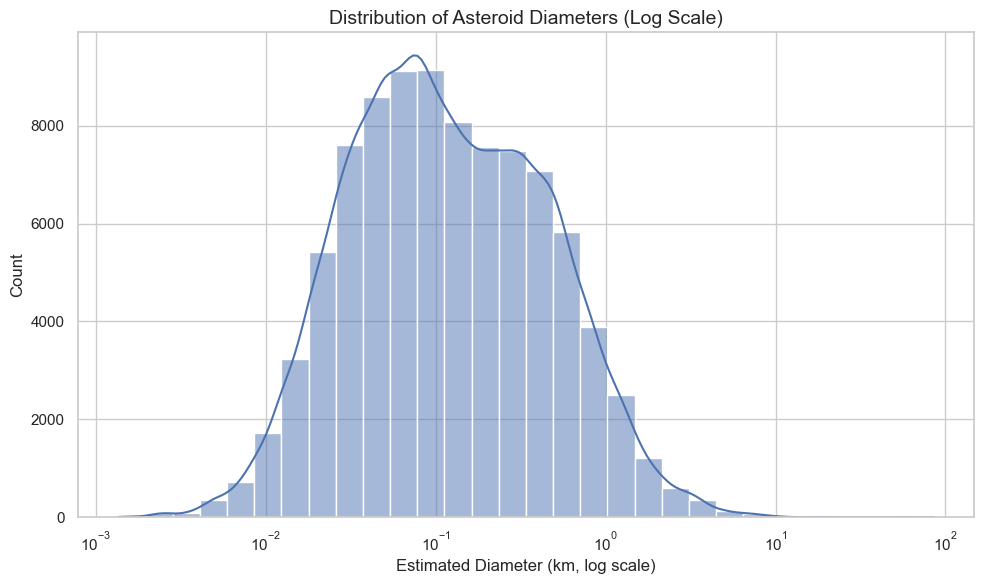

In [17]:
# ----------------------------
# Distribution of asteroid diameters (log scale)
# ----------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=neo_clean,
    x="est_diameter_max",  # maximum estimated diameter of asteroid
    bins=30,
    kde=True,
    log_scale=True        # log scale for better visualization
)
plt.title("Distribution of Asteroid Diameters (Log Scale)", fontsize=14)
plt.xlabel("Estimated Diameter (km, log scale)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

<p style="font-family:Georgia; text-align:justify;">
This histogram shows the distribution of maximum estimated asteroid diameters on a logarithmic scale: larger values on the x‑axis mean bigger asteroids, and higher bars mean that size range is more common in the dataset.
</p>


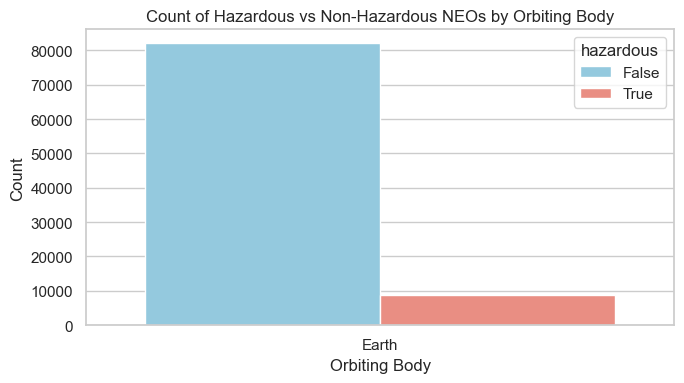

In [18]:
# ----------------------------
# Count of hazardous vs non-hazardous NEOs by orbiting body
# ----------------------------
plt.figure(figsize=(7, 4))
sns.countplot(
    data=neo_clean,
    x="orbiting_body",
    hue="hazardous",
    palette={False: "skyblue", True: "salmon"} 
)
plt.title("Count of Hazardous vs Non-Hazardous NEOs by Orbiting Body")
plt.xlabel("Orbiting Body")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<p style="font-family:Georgia; text-align:justify;">
This bar chart compares the number of hazardous and non-hazardous Near-Earth Objects (NEOs) that orbit Earth. It shows that most NEOs are non-hazardous, while only a much smaller portion is classified as hazardous.
</p>


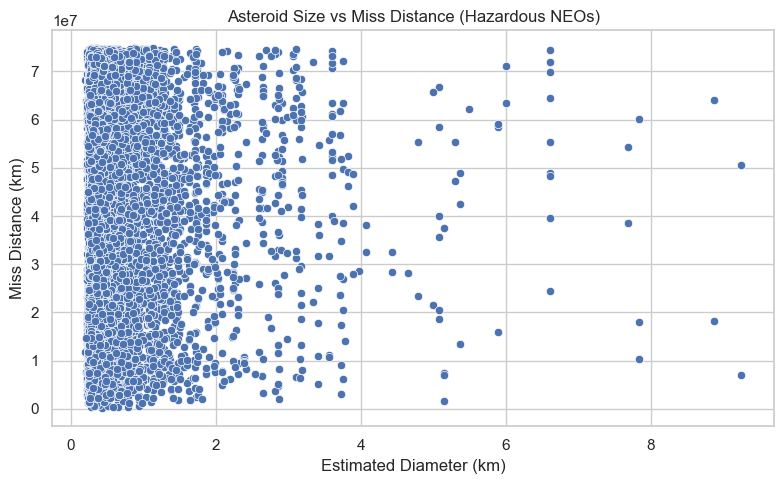

In [19]:
# ----------------------------
# Scatter: asteroid size vs miss distance (hazardous only)
# ----------------------------
plt.figure(figsize=(8, 5))

# Scatterplot për vetëm asteroidet e rrezikshme
sns.scatterplot(
    data=neo[neo['hazardous'] == True],  # filter inline
    x="est_diameter_max",
    y="miss_distance"
)

plt.title("Asteroid Size vs Miss Distance (Hazardous NEOs)")
plt.xlabel("Estimated Diameter (km)")
plt.ylabel("Miss Distance (km)")
plt.tight_layout()
plt.show()


<p style="font-family:Georgia; text-align:justify;">
Each point in this scatter plot is a potentially hazardous asteroid. This scatter plot shows how the estimated diameter of potentially hazardous asteroids relates to their miss distance from Earth: the bigger the asteroid, the more important it is to check whether it comes close to Earth.
</p>


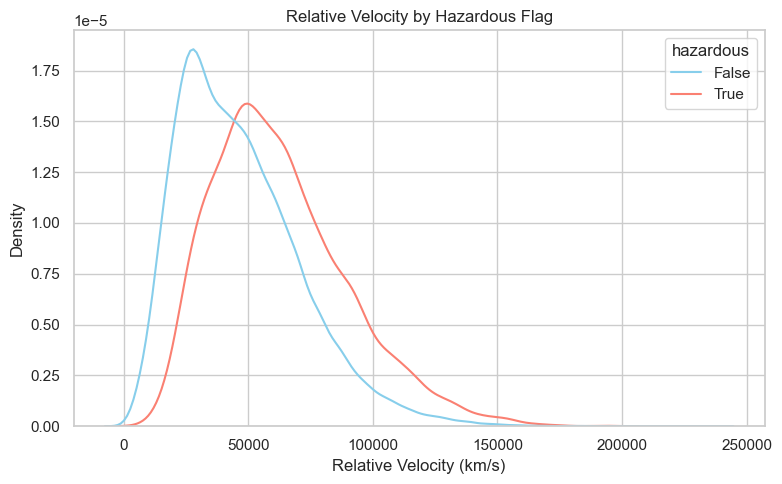

In [20]:
# ----------------------------
# Relative velocity distribution by hazard flag
# ----------------------------
# Ensure relative_velocity is numeric
neo_clean["relative_velocity"] = neo_clean["relative_velocity"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(
    data=neo_clean,
    x="relative_velocity",
    hue="hazardous",
    common_norm=False,                # density is not normalized together
    palette={False: "skyblue", True: "salmon"},
    ax=ax
)
ax.set_title("Relative Velocity by Hazardous Flag")
ax.set_xlabel("Relative Velocity (km/s)")
ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

<p style="font-family:Georgia; text-align:justify;">
This plot compares the distribution of relative velocities for hazardous and non‑hazardous NEOs: both groups peak around tens of thousands of km/s, but hazardous asteroids (red line) tend to have slightly higher typical velocities and a longer high‑speed tail than non‑hazardous ones (blue line).
The higher the density of an asteroid, the more mass it has in the same size, so if it is moving fast it hits harder and causes more damage.
</p>


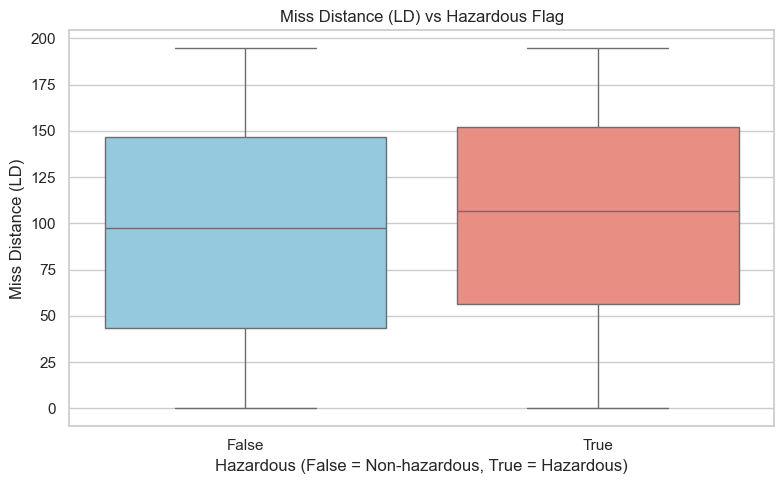

In [21]:
# ----------------------------
# Boxplot: Miss Distance in Lunar Distance vs Hazardous Flag
# ----------------------------
# Convert miss distance to Lunar Distance
neo_clean["miss_distance_ld"] = neo_clean["miss_distance"] / 384400  # 1 LD = 384,400 km

fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(
    data=neo_clean,
    x="hazardous",
    y="miss_distance_ld",
    hue="hazardous",
    palette={False: "skyblue", True: "salmon"},
    dodge=False,
    ax=ax
)
ax.set_title("Miss Distance (LD) vs Hazardous Flag")
ax.set_xlabel("Hazardous (False = Non-hazardous, True = Hazardous)")
ax.set_ylabel("Miss Distance (LD)")

# Remove extra legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.tight_layout()
plt.show()


<p style="font-family:Georgia; text-align:justify;">
This box plot compares how far hazardous and non‑hazardous asteroids pass from Earth. Both sides look very similar, so hazardous asteroids do not usually pass much closer than non‑hazardous ones in this dataset.
</p>


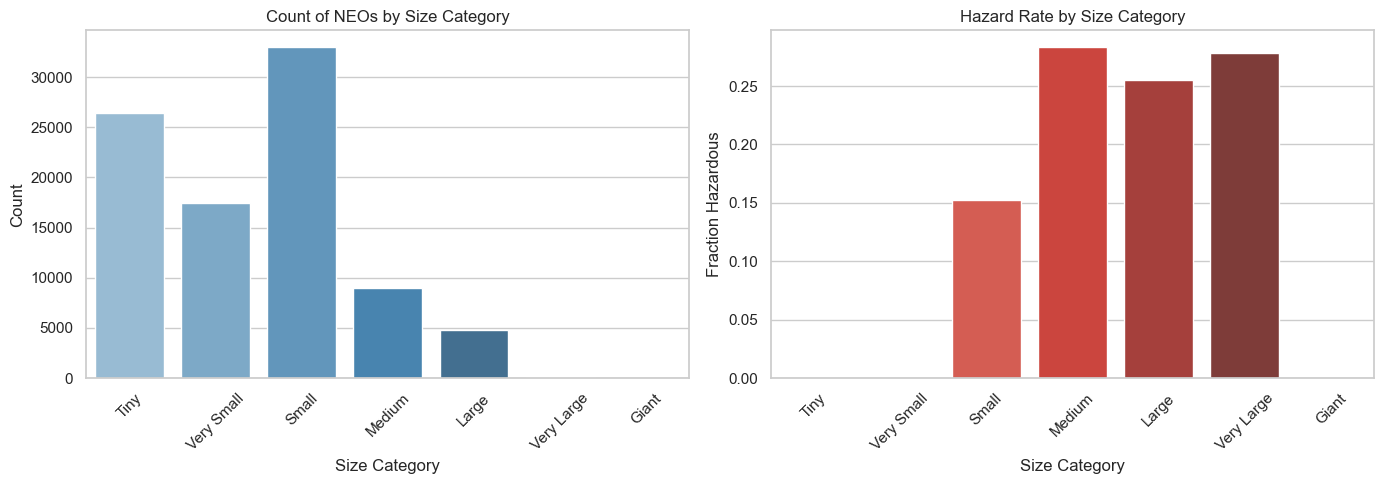

In [22]:
# ----------------------------
# Size categories: Count & Hazard Rate
# ----------------------------
# Create size categories based on est_diameter_max
bins = [0, 0.05, 0.1, 0.5, 1, 5, 10, 50]  # km
labels = ["Tiny", "Very Small", "Small", "Medium", "Large", "Very Large", "Giant"]
neo_clean["size_category"] = pd.cut(neo_clean["est_diameter_max"], bins=bins, labels=labels)

# Count of NEOs per size category
size_counts = neo_clean["size_category"].value_counts().sort_index()

# Fraction hazardous per size category
size_hazard_rate = neo_clean.groupby("size_category", observed=True)["hazardous"].mean().sort_index()

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count barplot
sns.barplot(
    x=size_counts.index,
    y=size_counts.values,
    ax=axes[0],
    hue=size_counts.index,
    dodge=False,
    legend=False,
    palette="Blues_d"
)
axes[0].set_title("Count of NEOs by Size Category")
axes[0].set_xlabel("Size Category")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Hazard rate barplot
sns.barplot(
    x=size_hazard_rate.index,
    y=size_hazard_rate.values,
    ax=axes[1],
    hue=size_hazard_rate.index,
    dodge=False,
    legend=False,
    palette="Reds_d"
)
axes[1].set_title("Hazard Rate by Size Category")
axes[1].set_xlabel("Size Category")
axes[1].set_ylabel("Fraction Hazardous")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<p style="font-family:Georgia; text-align:justify;">
The left bar chart shows how many NEOs there are in each size category: most objects are tiny, very small, or small, and only a few are medium, large, very large, or giant.
</p>
<p style="font-family:Georgia; text-align:justify;">
The right bar chart shows the fraction that are hazardous in each size group: tiny and very small NEOs are almost never hazardous, while the hazard rate rises for medium, large, and very large objects, which are fewer in number but more often classified as hazardous. In this dataset, a larger fraction of medium‑sized asteroids are labeled hazardous than the biggest ones, not because they are physically safer, but because very large asteroids are extremely rare, so the statistics for them are based on only a few objects.
</p>


<h2 style="color:darkblue; font-family:Verdana;">
5. Insights — NEO Threat Story
</h2>
<hr style="border:1px solid darkblue;"/>


<p style="font-family:Georgia; text-align:justify;">
This line plot shows how many hazardous NEOs are recorded each year. An upward trend usually reflects better surveys and more powerful telescopes rather than a sudden change in the universe. It is a visual record of how seriously humanity has begun to watch the sky for dangerous visitors.
</p>


<ul style="font-family:Georgia;">
<li><b>Most NEOs are small, but a few large bodies dominate the danger.</b> The size distribution is heavily skewed: countless small rocks and a very small number of large ones, which carry most of the potential impact energy.</li>
<li><b>The most concerning objects are both big and close.</b> The scatter plot reveals several hazardous asteroids with high diameter and low miss distance, exactly the kind of cases that a simple <code>threat_score</code> is designed to flag.</li>
<li><b>Survey effort turns into knowledge.</b> The yearly trend of hazardous NEO detections suggests that, as observation improves, the catalog of known threats grows. This does not make the universe more dangerous, but it does make us less blind to the risks that were always there.</li>
</ul>

<p style="font-family:Georgia; text-align:justify;">
Taken together, the tables and plots show that Earth lives between close calls and increasing awareness. The more carefully we watch, the better we can prepare for the rare but serious rocks that share our part of space.
</p>



<h1 style="color:crimson; text-align:center; font-family:Verdana; font-size:36px; line-height:1.2;">
🌠 Exoplanets of Wonder: Journey to Earth-Like Worlds 🌠
</h1>


<img src="https://cf-img-a-in.tosshub.com/sites/visualstory/wp/2024/06/AdobeStock_681673789.jpeg?size=*:900" width="1000">

<p style="text-align:center; font-family:Georgia; font-size:14px;">
A distant exoplanet — a glimpse of hope beyond our solar system.
</p>


<h2 style="color:darkblue; font-family:Verdana;">
Exploring the Kepler Exoplanet Search Dataset
</h2>
<hr style="border:1px solid darkblue;"/>

Loading Kaggle dataset...
------------------------------------------------------------
✓ Successfully loaded 9,564 records
✓ Features: 50 columns

📊 First 5 rows of Kaggle data:


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488,0.000,-0.000,170.539,0.002,-0.002,0.146,0.318,-0.146,2.958,0.082,-0.082,615.800,19.500,-19.500,2.260,0.260,-0.150,793.000,NaN,NaN,93.590,29.450,-16.650,35.800,1.000,q1_q17_dr25_tce,5455.000,81.000,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418,0.000,-0.000,162.514,0.004,-0.004,0.586,0.059,-0.443,4.507,0.116,-0.116,874.800,35.500,-35.500,2.830,0.320,-0.190,443.000,NaN,NaN,9.110,2.870,-1.620,25.800,2.000,q1_q17_dr25_tce,5455.000,81.000,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899,0.000,-0.000,175.850,0.001,-0.001,0.969,5.126,-0.077,1.782,0.034,-0.034,10829.000,171.000,-171.000,14.600,3.920,-1.310,638.000,NaN,NaN,39.300,31.040,-10.490,76.300,1.000,q1_q17_dr25_tce,5853.000,158.000,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.737,0.000,-0.000,170.308,0.000,-0.000,1.276,0.115,-0.092,2.406,0.005,-0.005,8079.200,12.800,-12.800,33.460,8.500,-2.830,1395.000,NaN,NaN,891.960,668.950,-230.350,505.600,1.000,q1_q17_dr25_tce,5805.000,157.000,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.526,0.000,-0.000,171.596,0.001,-0.001,0.701,0.235,-0.478,1.655,0.042,-0.042,603.300,16.900,-16.900,2.750,0.880,-0.350,1406.000,NaN,NaN,926.160,874.330,-314.240,40.900,1.000,q1_q17_dr25_tce,6031.000,169.000,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509



KAGGLE EXOPLANET ANALYSIS

📏 Dataset Shape: 9,564 rows × 50 columns

📋 Data Types:
float64    39
int64       6
object      5
Name: count, dtype: int64

🔍 Missing Data Analysis - Kaggle
------------------------------------------------------------


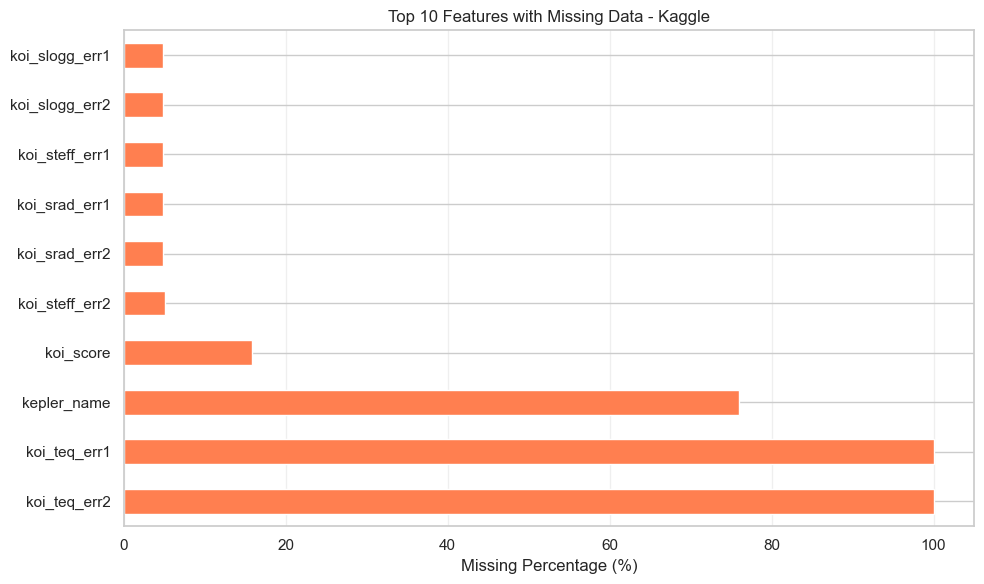

In [4]:
def load_kaggle_data(filepath='data/raw/kaggle_exoplanet_data.csv'):
    """Load Kaggle dataset"""
    print("Loading Kaggle dataset...")
    print("-" * 60)
    
    try:
        df = pd.read_csv(filepath)
        print(f"✓ Successfully loaded {len(df):,} records")
        print(f"✓ Features: {len(df.columns)} columns")
        return df
    except FileNotFoundError:
        print(f"✗ File not found: {filepath}")
        return None
    except Exception as e:
        print(f"✗ Error loading Kaggle data: {e}")
        return None


def analyze_dataset(df, dataset_name="Dataset"):
    """Comprehensive dataset analysis"""
    print(f"\n{'='*60}")
    print(f"{dataset_name.upper()} ANALYSIS")
    print(f"{'='*60}")
    
    # Basic info
    print(f"\n📏 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    
    # Data types
    print(f"\n📋 Data Types:")
    print(df.dtypes.value_counts())
    
    return df



def missing_data_analysis(df, dataset_name="Dataset"):
    """Analyze missing data"""
    print(f"\n🔍 Missing Data Analysis - {dataset_name}")
    print("-" * 60)
    
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    # Create missing data summary
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percentage': missing_pct
    }).sort_values('Missing_Percentage', ascending=False)
    
    # Show only columns with missing data
    missing_df = missing_df[missing_df['Missing_Count'] > 0]
    
    if len(missing_df) > 0:
        
        # Visualize top missing features
        if len(missing_df) >= 10:
            fig, ax = plt.subplots(figsize=(10, 6))
            missing_df.head(10)['Missing_Percentage'].plot(kind='barh', ax=ax, color='coral')
            ax.set_xlabel('Missing Percentage (%)')
            ax.set_title(f'Top 10 Features with Missing Data - {dataset_name}')
            ax.grid(axis='x', alpha=0.3)
            plt.tight_layout()
            plt.savefig(f'figures/missing_data_{dataset_name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
            plt.show()
    else:
        print("✓ No missing data!")
    
    return missing_df


# Load Kaggle data
kaggle_df = load_kaggle_data()

# Display Kaggle data if available
if kaggle_df is not None:
    print("\n📊 First 5 rows of Kaggle data:")
    display(kaggle_df.head())
    
    # Analyze Kaggle dataset
    kaggle_df = analyze_dataset(kaggle_df, "Kaggle Exoplanet")
    kaggle_missing = missing_data_analysis(kaggle_df, "Kaggle")

<h2 style="color:darkblue; font-family:Verdana;">
2. Data Cleaning
</h2>
<p style="font-family: Georgia; text-align: justify;">
This function systematically cleans the Kaggle exoplanet dataset through a multi-step process:
</p>
<ul style="font-family: Georgia;">
<li><b>Removes noise:</b> Drops error columns, non-predictive features, and rows with missing target values</li>
<li><b>Standardizes naming:</b> Renames raw Kepler columns to meaningful feature names (e.g., <code>koi_period</code> → <code>orbital_period_days</code>)</li>
<li><b>Handles missing data:</b> Removes rows with missing numeric features, imputes remaining gaps with median values</li>
<li><b>Detects outliers:</b> Identifies extreme values (>4 standard deviations from mean) using PCA visualization and boxplots</li>
<li><b>Removes outliers:</b> Filters out anomalous rows to ensure data quality</li>
<li><b>Returns clean dataset:</b> Produces a validated dataset ready for machine learning, eliminating ~80% of rows with quality issues</li>
</ul>


STEP 1: DATA CLEANING

Starting dataset: 9,564 rows × 50 columns
✓ Dropped 22 error columns
✓ Dropped 8 non-predictive columns
✓ Selected 19 essential features
✓ Removed 0 rows with missing target
✓ Removed 1,569 rows with missing numeric features


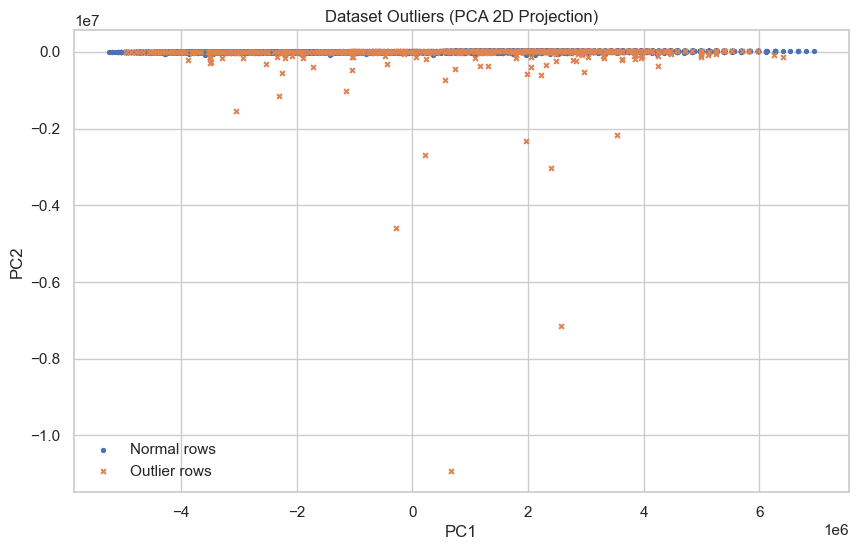

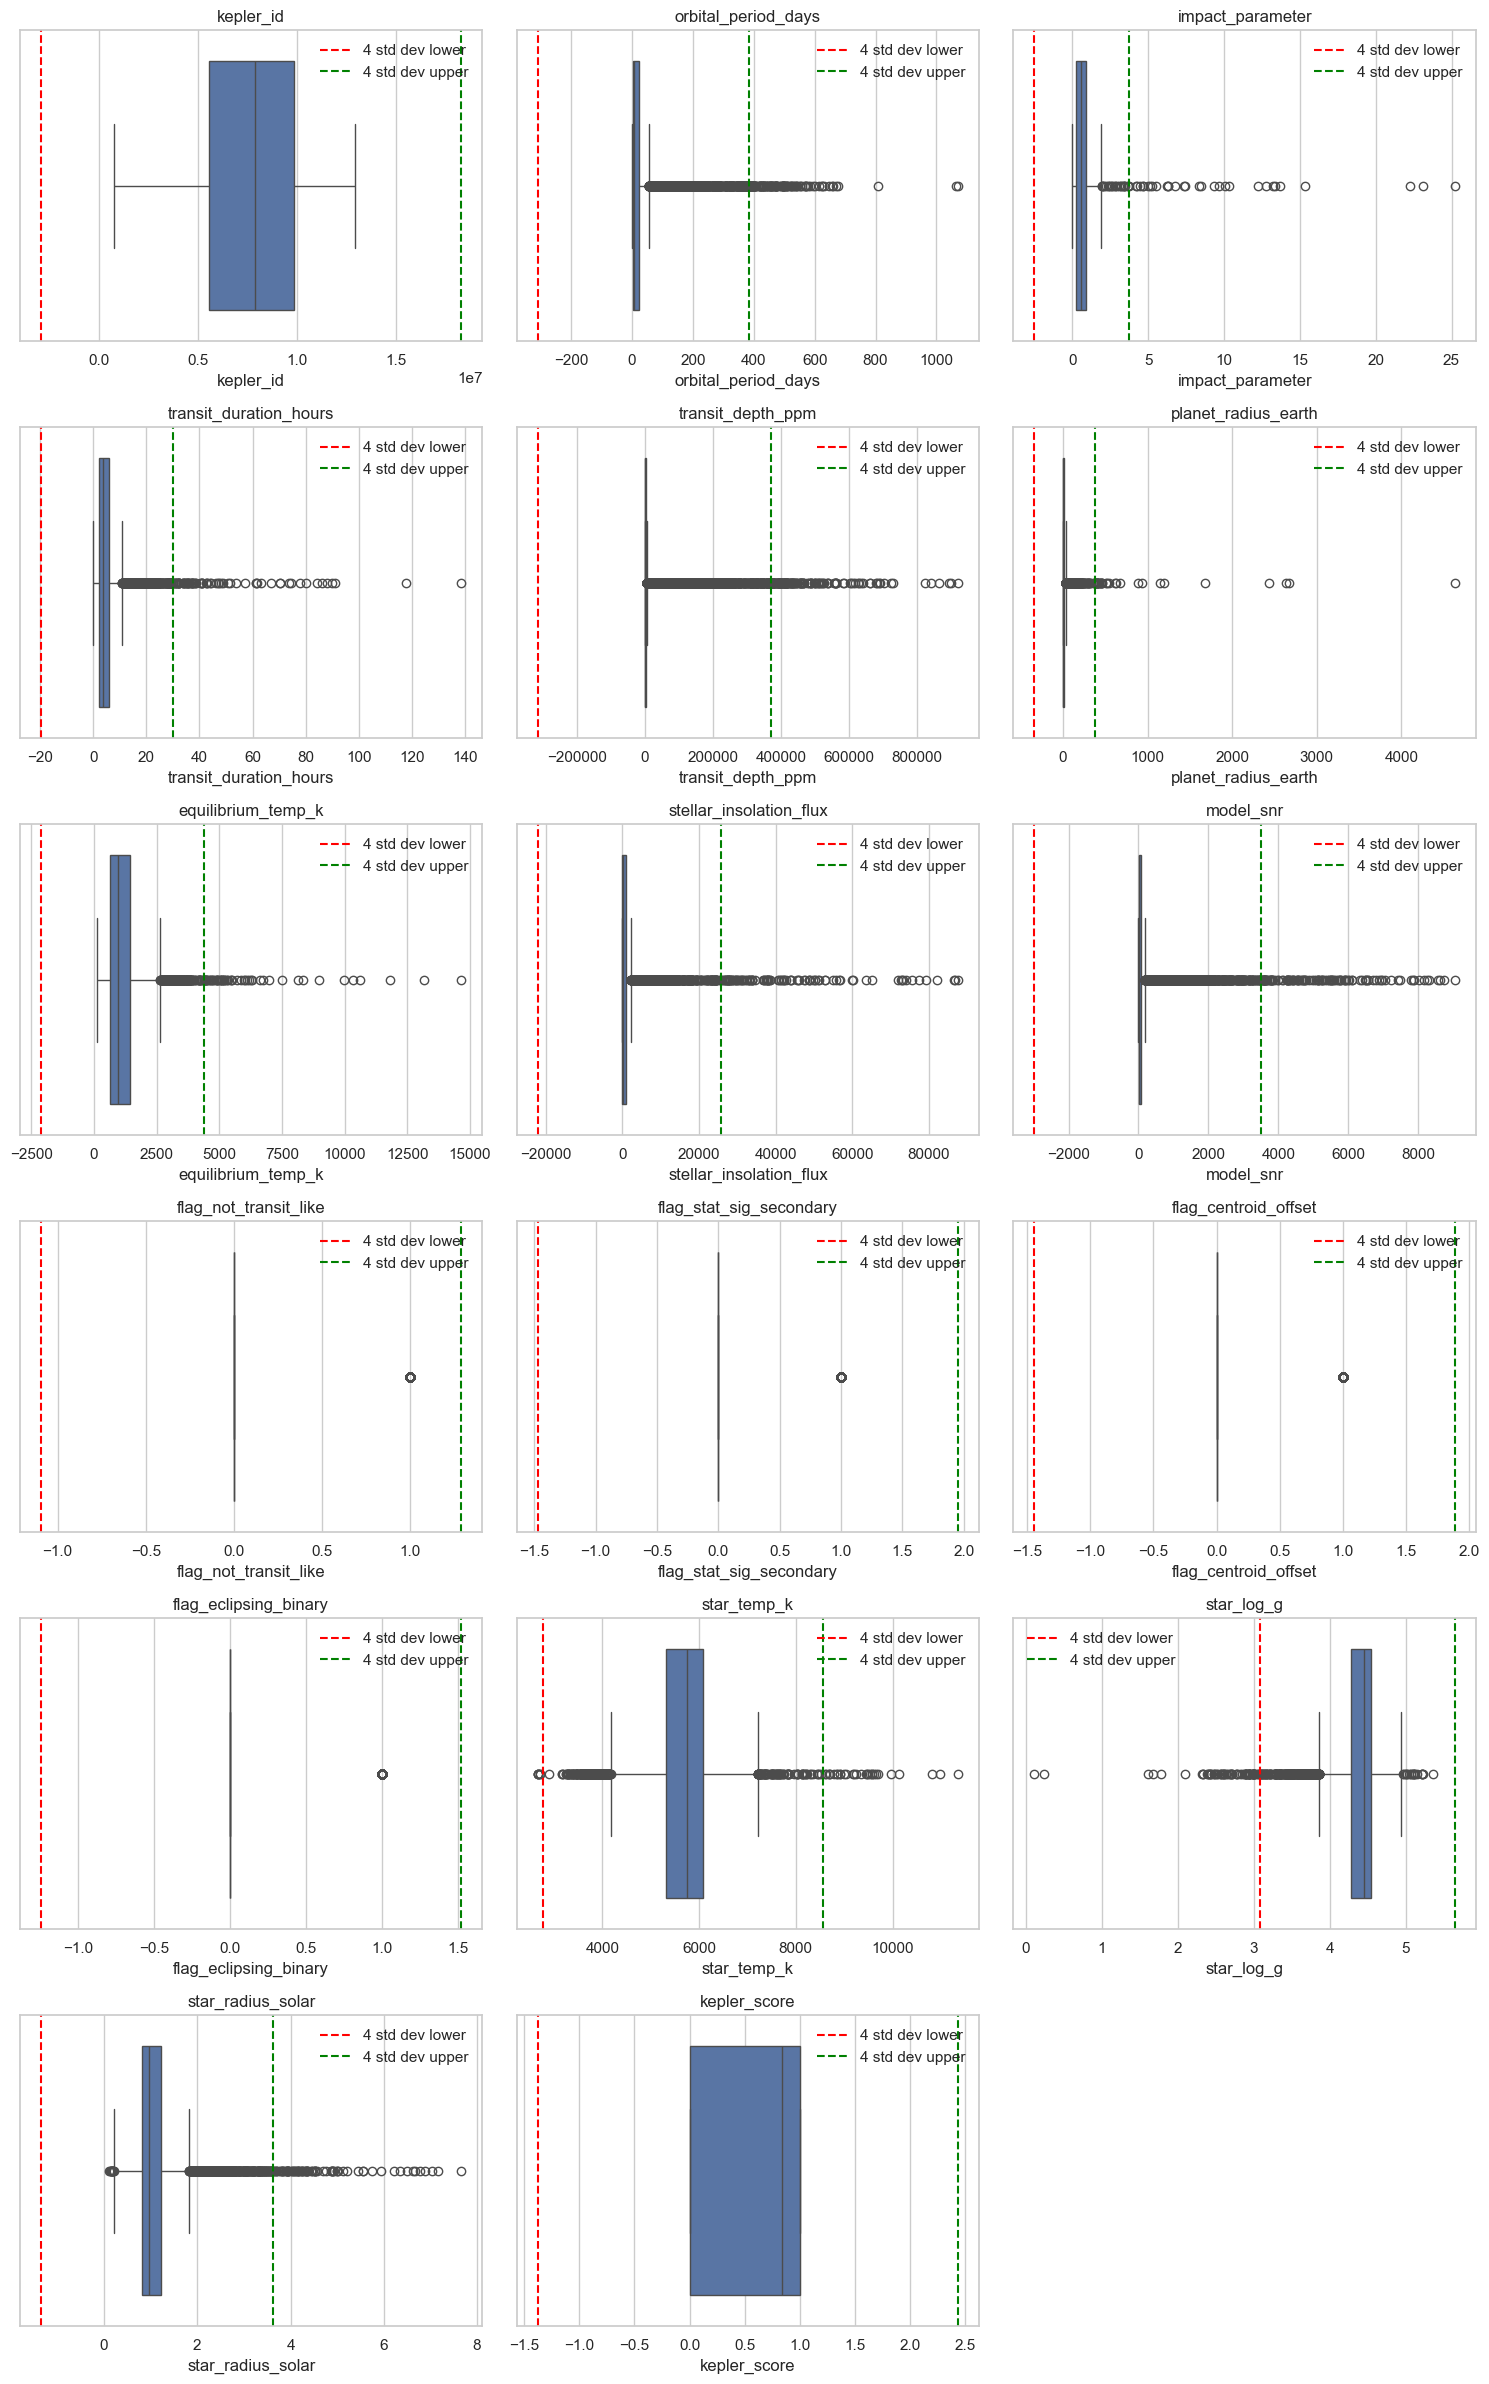

✓ Removed 885 outlier rows

✅ CLEANED DATASET: 7,110 rows × 19 columns
   Missing values: 0


In [21]:
def clean_kaggle_data(df):
    """
    Clean Kaggle exoplanet dataset - ADAPTED FOR YOUR ACTUAL COLUMNS
    """
    print(f"\n{'='*70}")
    print("STEP 1: DATA CLEANING")
    print(f"{'='*70}")
    
    df_clean = df.copy()
    print(f"\nStarting dataset: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")
    
    # Drop error columns (we'll use the actual measurements, not errors)
    error_cols = [col for col in df_clean.columns if 'err' in col]
    df_clean = df_clean.drop(columns=error_cols)
    print(f"✓ Dropped {len(error_cols)} error columns")
    
    # Drop columns we don't need
    drop_cols = ['rowid', 'koi_tce_plnt_num', 'koi_tce_delivname', 
                 'koi_pdisposition', 'koi_time0bk', 'ra', 'dec', 'koi_kepmag']
    df_clean = df_clean.drop(columns=[col for col in drop_cols if col in df_clean.columns])
    print(f"✓ Dropped {len(drop_cols)} non-predictive columns")
    
    # Select features we'll actually use
    feature_cols = [
        'kepid', 'kepoi_name', 'koi_disposition',
        'koi_period', 'koi_impact', 'koi_duration', 'koi_depth',
        'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
        'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
        'koi_steff', 'koi_slogg', 'koi_srad', 'koi_score'
    ]
    df_clean = df_clean[[col for col in feature_cols if col in df_clean.columns]]
    print(f"✓ Selected {len(df_clean.columns)} essential features")

     # Rename columns
    rename_map = {
        "kepid": "kepler_id",
        "kepoi_name": "planet_name",
        "koi_disposition": "disposition",
    
        # Planet transit / orbital features
        "koi_period": "orbital_period_days",
        "koi_impact": "impact_parameter",
        "koi_duration": "transit_duration_hours",
        "koi_depth": "transit_depth_ppm",
        "koi_prad": "planet_radius_earth",
        "koi_teq": "equilibrium_temp_k",
        "koi_insol": "stellar_insolation_flux",
    
        # SNR / signal features
        "koi_model_snr": "model_snr",
        "koi_score": "kepler_score",
    
        # False positive flags
        "koi_fpflag_nt": "flag_not_transit_like",
        "koi_fpflag_ss": "flag_stat_sig_secondary",
        "koi_fpflag_co": "flag_centroid_offset",
        "koi_fpflag_ec": "flag_eclipsing_binary",
    
        # Stellar parameters
        "koi_steff": "star_temp_k",
        "koi_slogg": "star_log_g",
        "koi_srad": "star_radius_solar",
    }
    df_clean = df_clean.rename(columns=rename_map)
    
    # Remove rows where target is missing
    rows_before = len(df_clean)
    df_clean = df_clean[df_clean['disposition'].notna()]
    print(f"✓ Removed {rows_before - len(df_clean):,} rows with missing target")
    
    # Remove rows with missing core numeric features
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    rows_before = len(df_clean)
    df_clean = df_clean.dropna(subset=numeric_cols)
    print(f"✓ Removed {rows_before - len(df_clean):,} rows with missing numeric features")
    
    # Impute any remaining missing values with median
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)


    # Step 1 — Identify numeric columns
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    
    # Step 2 — Find outlier rows (any column > 4 std from mean)
    means = df_clean[numeric_cols].mean()
    stds = df_clean[numeric_cols].std()
    
    lower = means - 4 * stds
    upper = means + 4 * stds
    
    # Boolean mask of which rows are outliers
    outlier_mask = ((df_clean[numeric_cols] < lower) | (df_clean[numeric_cols] > upper)).any(axis=1)
    
    # Step 3 — PCA for plotting (manual SVD, no sklearn needed)
    X = df_clean[numeric_cols].fillna(df_clean[numeric_cols].mean()).values
    X_centered = X - X.mean(axis=0)
    
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    PC1 = U[:,0] * S[0]
    PC2 = U[:,1] * S[1]
    
    # Step 4 — Plot
    plt.figure(figsize=(10,6))
    plt.scatter(PC1[~outlier_mask], PC2[~outlier_mask], s=8, label='Normal rows')
    plt.scatter(PC1[outlier_mask], PC2[outlier_mask], s=12, label='Outlier rows', marker='x')
    plt.title("Dataset Outliers (PCA 2D Projection)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()

    # Find outliers (>4 std dev)
    rows_before = len(df_clean)
    # Parameters for subplot layout
    cols_per_row = 3
    num_cols = len(numeric_cols)
    rows = math.ceil(num_cols / cols_per_row)
    
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 4*rows))
    axes = axes.flatten()
    
    # Loop to plot
    for i, col in enumerate(numeric_cols):
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        lower_bound = mean - 4*std
        upper_bound = mean + 4*std
    
        sns.boxplot(x=df_clean[col], ax=axes[i])
        axes[i].axvline(lower_bound, color='red', linestyle='--', label='4 std dev lower')
        axes[i].axvline(upper_bound, color='green', linestyle='--', label='4 std dev upper')
        axes[i].set_title(f'{col}')
        axes[i].legend()
    
        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & 
                            (df_clean[col] <= upper_bound)]
    
    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    print(f"✓ Removed {rows_before - len(df_clean):,} outlier rows")
    
    # Final validation
    print(f"\n✅ CLEANED DATASET: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")
    print(f"   Missing values: {df_clean.isnull().sum().sum()}")
    
    return df_clean

df_clean = clean_kaggle_data(kaggle_df)

 <h3 style="color: #1e40af; font-family: Verdana;">Exploratory Data Analysis Function
</h3> 
 <p style="font-family: Georgia; text-align: justify;"> This function performs comprehensive exploratory analysis on the cleaned dataset to understand its structure and relationships: </p> <ul style="font-family: Georgia;"> <li><b>Class distribution:</b> Displays count and percentage breakdown of the three target classes (CONFIRMED, CANDIDATE, FALSE POSITIVE) with visual bar representation</li> <li><b>Feature statistics:</b> Calculates summary statistics for all numeric features to understand their ranges and distributions</li> <li><b>Correlation analysis:</b> Identifies the top 10 features most strongly correlated with the target variable, showing which signals matter most for prediction</li> <li><b>Visualizations:</b> Creates two plots—a horizontal bar chart of feature correlations and a vertical bar chart of class distribution with color coding</li> <li><b>Returns feature list:</b> Provides the cleaned feature columns for downstream modeling steps</li> </ul>



STEP 2: EXPLORATORY DATA ANALYSIS

🎯 Target Variable Distribution:
----------------------------------------------------------------------
  FALSE POSITIVE      :  3,162 ( 44.5%) ██████████████████████
  CONFIRMED           :  2,252 ( 31.7%) ███████████████
  CANDIDATE           :  1,696 ( 23.9%) ███████████

📊 Feature Statistics:
----------------------------------------------------------------------

🔗 Top Features Correlated with Target:
----------------------------------------------------------------------
Top 10 features:
  star_temp_k              :  0.0969 ████
  impact_parameter         :  0.0846 ████
  equilibrium_temp_k       :  0.0734 ███
  flag_stat_sig_secondary  :  0.0631 ███
  orbital_period_days      :  0.0601 ███
  planet_radius_earth      :  0.0580 ██
  stellar_insolation_flux  :  0.0573 ██
  star_radius_solar        :  0.0573 ██
  flag_centroid_offset     :  0.0538 ██
  flag_eclipsing_binary    :  0.0420 ██


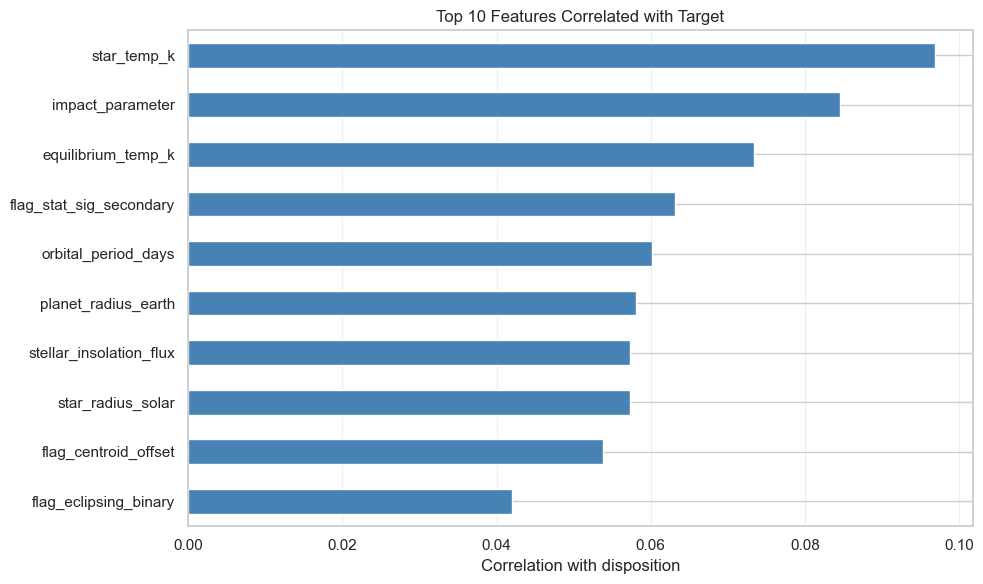

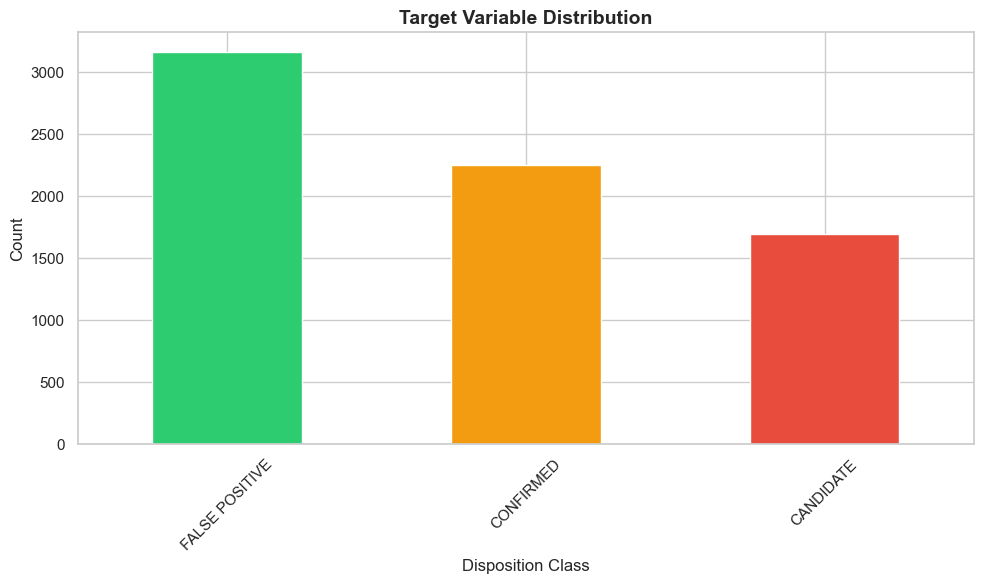

In [11]:
# ============================================================================
# PART 2: EXPLORATORY DATA ANALYSIS
# ============================================================================

def perform_eda(df, target_col="disposition", id_col="kepler_id"):
    print(f"\n{'='*70}")
    print("STEP 2: EXPLORATORY DATA ANALYSIS")
    print(f"{'='*70}")

    # Target distribution
    print(f"\n🎯 Target Variable Distribution:")
    print("-" * 70)
    disposition_counts = df[target_col].value_counts()
    disposition_pcts = df[target_col].value_counts(normalize=True) * 100

    for disp in disposition_counts.index:
        count = disposition_counts[disp]
        pct = disposition_pcts[disp]
        bar = "█" * int(pct / 2)
        print(f"  {disp:20s}: {count:6,} ({pct:5.1f}%) {bar}")

    # Feature statistics
    print(f"\n📊 Feature Statistics:")
    print("-" * 70)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    feature_cols = [col for col in numeric_cols if col not in [id_col, target_col]]

    
    # Correlations with target
    print(f"\n🔗 Top Features Correlated with Target:")
    print("-" * 70)

    df_encoded = df.copy()
    df_encoded[target_col] = pd.factorize(df_encoded[target_col])[0]

    correlations = df_encoded[feature_cols + [target_col]].corr()[target_col].sort_values(ascending=False)

    print("Top 10 features:")
    for feat, corr in correlations.head(11).items():
        if feat != target_col:
            bar = "█" * int(abs(corr) * 50)
            print(f"  {feat:25s}: {corr:7.4f} {bar}")

    # Correlation plot
    fig, ax = plt.subplots(figsize=(10, 6))
    correlations.head(11)[1:].sort_values().plot(kind='barh', ax=ax, color='steelblue')
    ax.set_xlabel(f'Correlation with {target_col}')
    ax.set_title('Top 10 Features Correlated with Target')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Target distribution plot
    fig, ax = plt.subplots(figsize=(10, 6))
    disposition_counts.plot(kind='bar', ax=ax, color=['#2ecc71', '#f39c12', '#e74c3c'])
    ax.set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Disposition Class')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()

    return feature_cols

feature_cols = perform_eda(df_clean)

<h2 style="color: #1e40af; font-family: Verdana;">Enhanced Visualization Suite</h2>
<p style="font-family: Georgia; text-align: justify;">
This suite creates three comprehensive visualizations to understand the cleaned dataset's structure and relationships:
</p>
<ul style="font-family: Georgia;">
<li><b>Enhanced Target Distribution:</b> Side-by-side bar chart and pie chart showing class counts and percentages with annotations and color coding</li>
<li><b>Feature Distributions by Class:</b> Four violin plots displaying how key features (orbital period, planet radius, equilibrium temperature, stellar temperature) vary across the three disposition classes, revealing class-specific patterns</li>
<li><b>Correlation Heatmap:</b> Lower-triangular correlation matrix showing relationships between all numeric features and the encoded target, using color intensity to highlight strong positive (red) and negative (blue) correlations</li>
<li><b>Purpose:</b> Enables visual pattern recognition—identifying which features differ most between classes and discovering multicollinearity issues before modeling</li>
</ul>

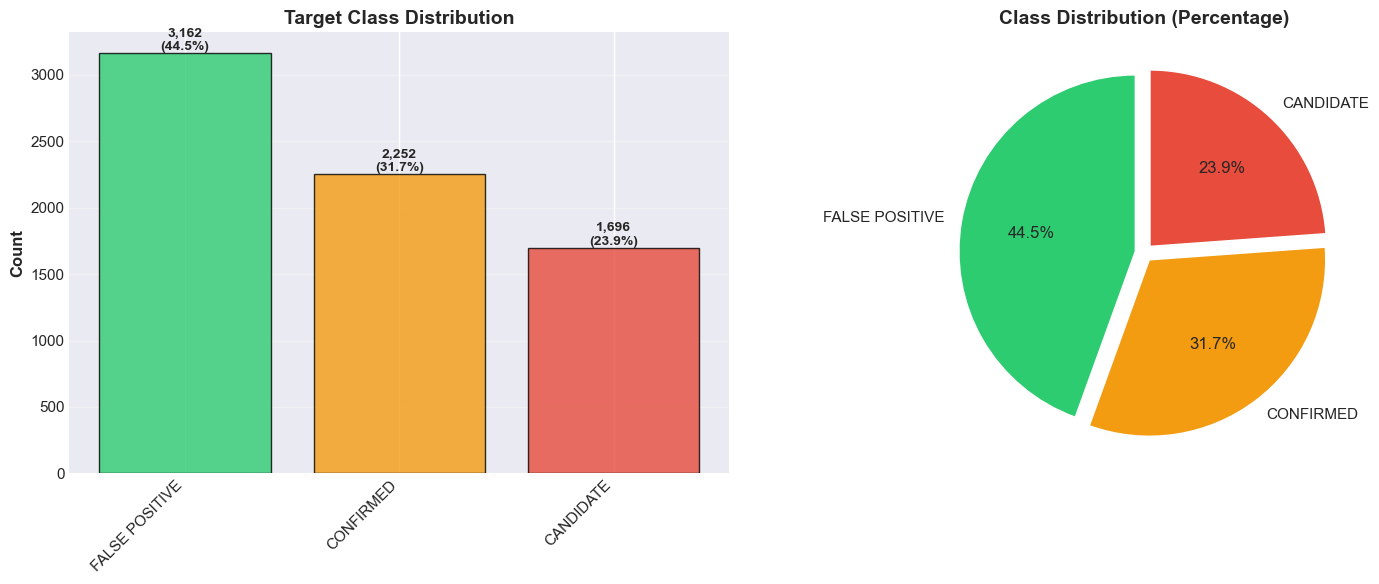

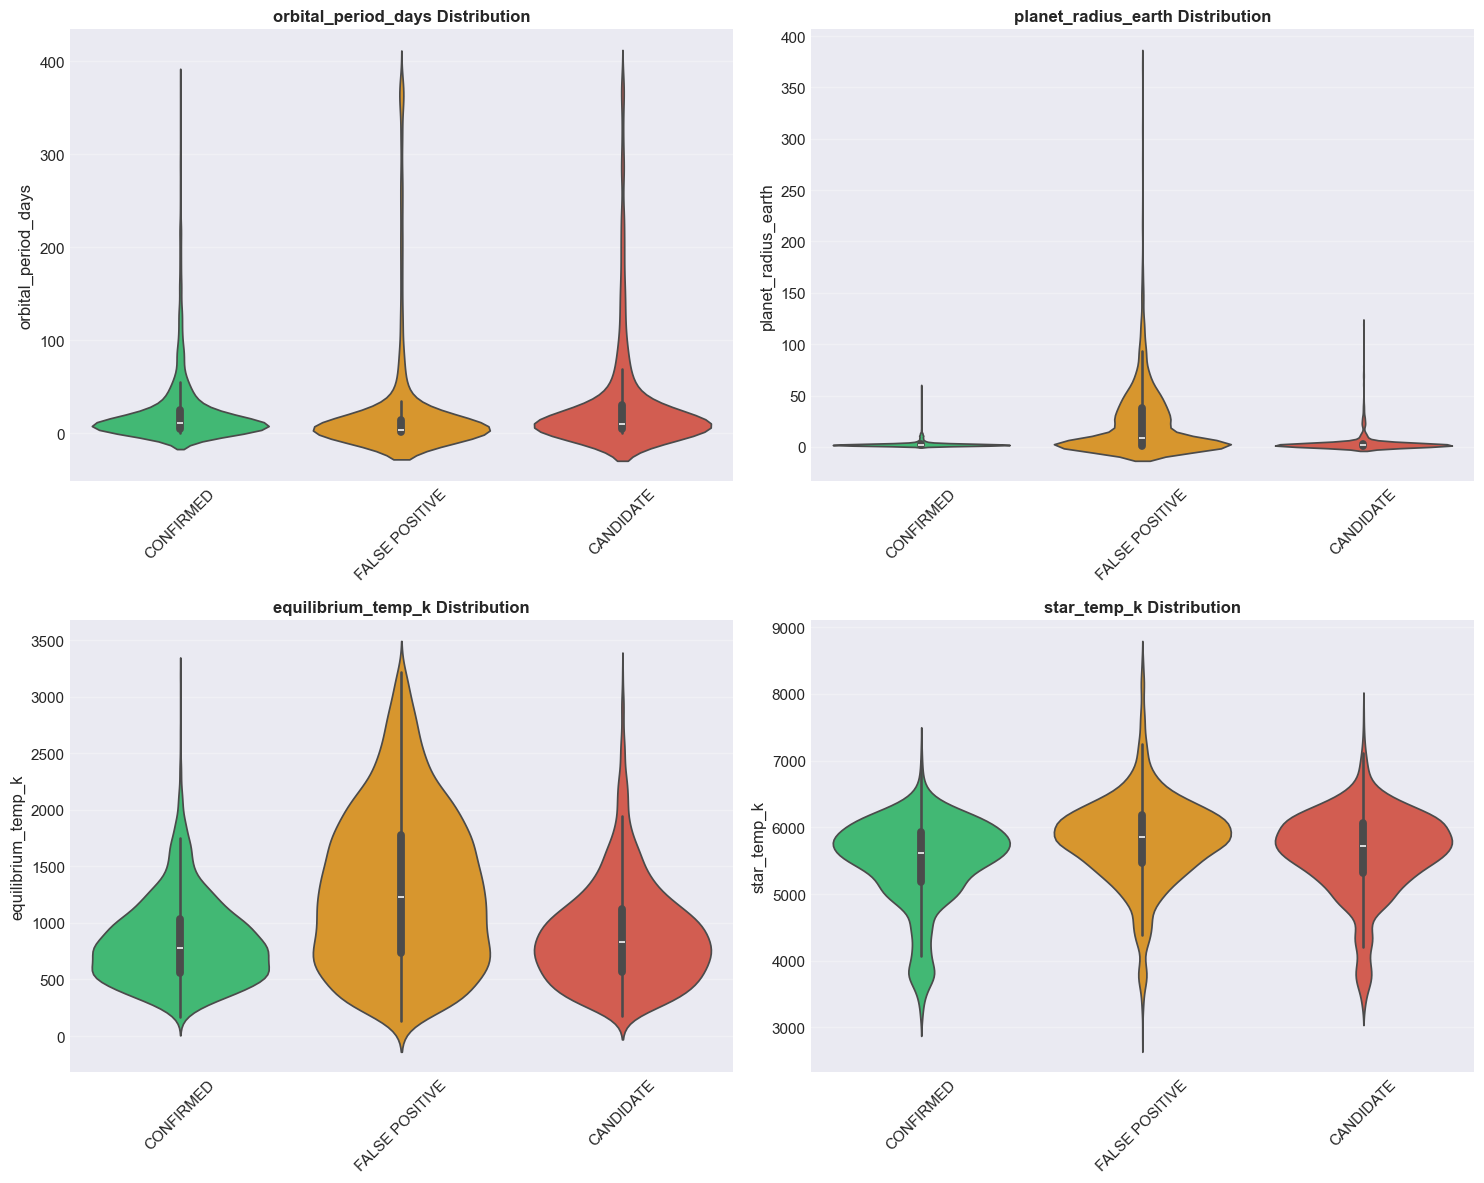

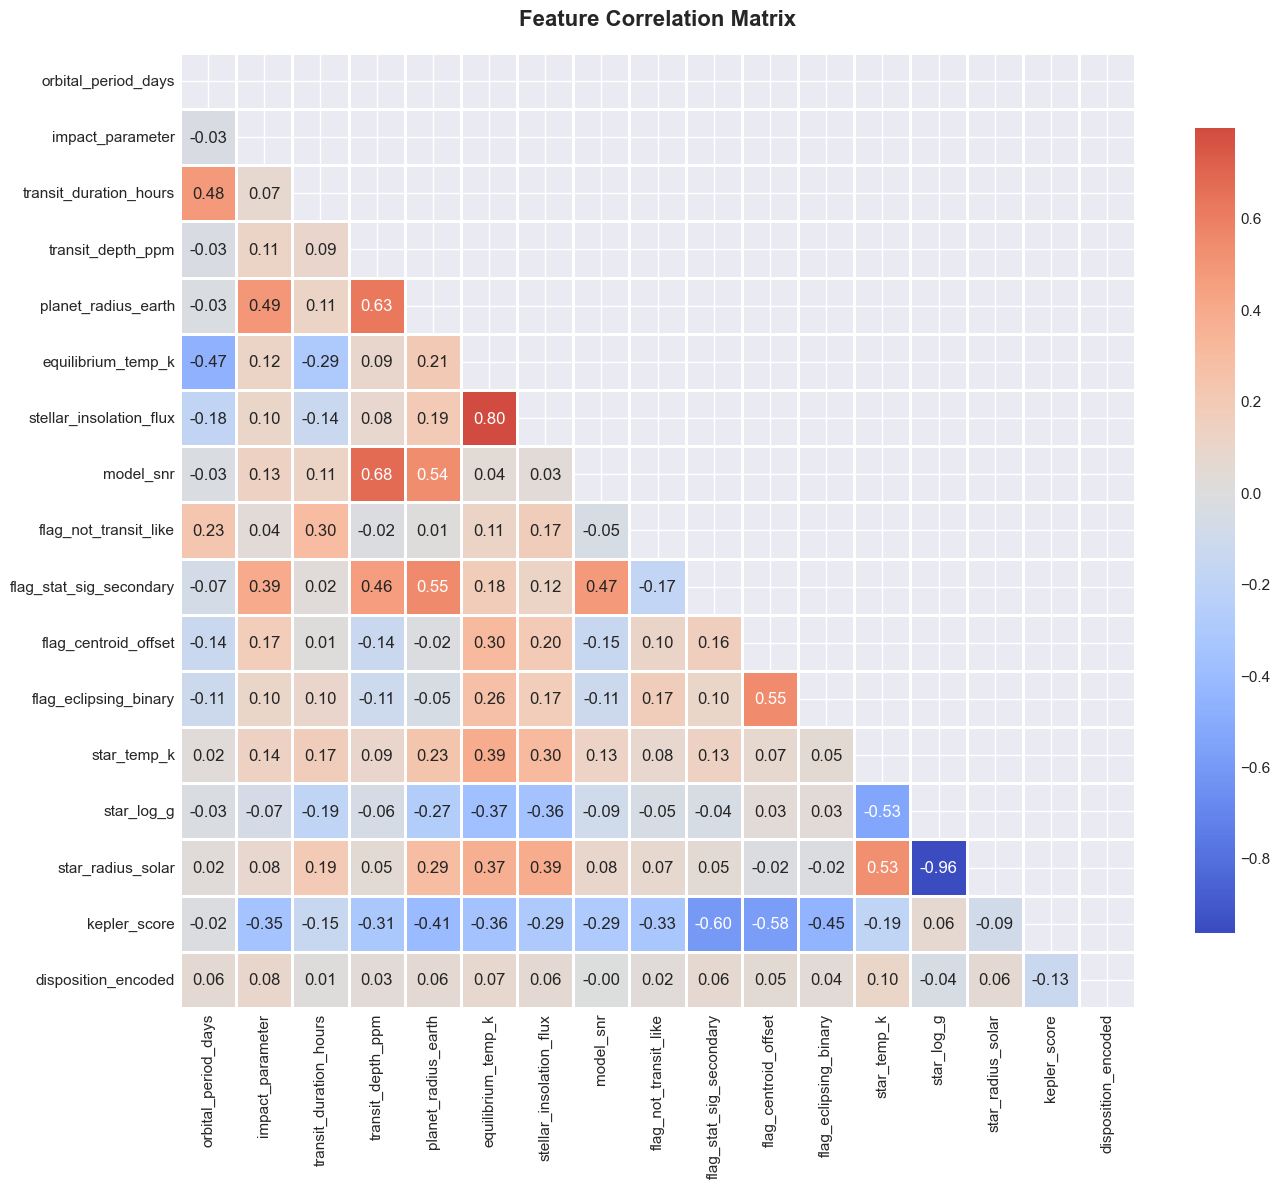

In [12]:
# ============================================================================
# ENHANCED VISUALIZATION SUITE FOR EXOPLANET CLASSIFICATION
# ============================================================================

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# 1. ENHANCED TARGET DISTRIBUTION
# ============================================================================

def plot_enhanced_target_distribution(df, save_path='figures/'):
    """
    Enhanced target distribution with pie chart and percentages
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot with percentages
    counts = df['disposition'].value_counts()
    colors = ['#2ecc71', '#f39c12', '#e74c3c']
    
    bars = ax1.bar(range(len(counts)), counts.values, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_xticks(range(len(counts)))
    ax1.set_xticklabels(counts.index, rotation=45, ha='right')
    ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax1.set_title('Target Class Distribution', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add percentage labels on bars
    total = counts.sum()
    for bar, count in zip(bars, counts.values):
        height = bar.get_height()
        percentage = (count / total) * 100
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Pie chart
    ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
    ax2.set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{save_path}enhanced_target_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 2. FEATURE DISTRIBUTIONS BY CLASS
# ============================================================================

def plot_feature_distributions_by_class(df, features, save_path='figures/'):
    """
    Violin plots showing feature distributions across classes
    """
    # Violin plots for top 4 features
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, feature in enumerate(features[:4]):
        sns.violinplot(data=df, x='disposition', y=feature, ax=axes[idx],
                      palette=['#2ecc71', '#f39c12', '#e74c3c'], inner='box')
        axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{save_path}feature_distributions_violin.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 3. CORRELATION HEATMAP
# ============================================================================

def plot_correlation_heatmap(df, features, save_path='figures/'):
    """
    Correlation heatmap of all numeric features
    """
    # Encode target for correlation
    df_encoded = df.copy()
    df_encoded['disposition_encoded'] = pd.factorize(df_encoded['disposition'])[0]
    
    # Calculate correlations
    corr_features = features + ['disposition_encoded']
    corr_matrix = df_encoded[corr_features].corr()
    
    # Plot
    fig, ax = plt.subplots(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True, linewidths=1,
                cbar_kws={"shrink": 0.8}, ax=ax)
    
    ax.set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(f'{save_path}correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

# 1. Enhanced target distribution
plot_enhanced_target_distribution(df_clean)

# 2. Feature distributions by class
key_features = ['orbital_period_days', 'planet_radius_earth', 'equilibrium_temp_k', 'star_temp_k', 'star_radius_solar', 'star_log_g']
plot_feature_distributions_by_class(df_clean, key_features)

# 3. Correlation heatmap
plot_correlation_heatmap(df_clean, feature_cols)


<h2 style="color: #1e40af; font-family: Verdana;">Data Preparation for Modeling</h2>
<p style="font-family: Georgia; text-align: justify;">
This function prepares the cleaned dataset for machine learning by splitting and scaling:
</p>
<ul style="font-family: Georgia;">
<li><b>Separates features and target:</b> Extracts feature matrix (X) and target variable (y), excluding the kepler_score column</li>
<li><b>Encodes target:</b> Maps disposition classes to numeric codes (CONFIRMED→0, CANDIDATE→1, FALSE POSITIVE→2)</li>
<li><b>Stratified train/val/test split:</b> Divides data into 70% training, 15% validation, and 15% test sets while maintaining class distribution across all splits</li>
<li><b>Feature scaling:</b> Standardizes all features using StandardScaler (zero mean, unit variance) separately on training data, then applies same transformation to validation and test sets</li>
<li><b>Returns scaled datasets:</b> Provides both unscaled and scaled feature matrices plus target arrays, ready for model training</li>
</ul>

In [13]:
# ============================================================================
# PART 3: PREPARE DATA FOR MODELING
# ============================================================================

def prepare_data(df, feature_cols):
    """
    Split and scale data
    """
    print(f"\n{'='*70}")
    print("STEP 3: DATA PREPARATION FOR MODELING")
    print(f"{'='*70}")
    
    # Separate X and y
    feature_cols = [col for col in feature_cols if col != 'kepler_score']
    X = df[feature_cols]
    y = df['disposition']
    
    print(f"\n📐 Dataset shapes:")
    print(f"  Features (X): {X.shape}")
    print(f"  Target (y): {y.shape}")
    
    # Encode target
    label_map = {'CONFIRMED': 0, 'CANDIDATE': 1, 'FALSE POSITIVE': 2}
    y_encoded = y.map(label_map)
    
    # Stratified split (70/15/15)
    print(f"\n✂️  Stratified split: 70% train / 15% val / 15% test")
    
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y_encoded, test_size=0.15, stratify=y_encoded, random_state=42
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42
    )
    
    print(f"\n📊 Final split:")
    print(f"  Train: {X_train.shape[0]:6,} ({X_train.shape[0]/len(X)*100:5.1f}%)")
    print(f"  Val:   {X_val.shape[0]:6,} ({X_val.shape[0]/len(X)*100:5.1f}%)")
    print(f"  Test:  {X_test.shape[0]:6,} ({X_test.shape[0]/len(X)*100:5.1f}%)")
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"✓ Features standardized")
    
    return (X_train, X_val, X_test, y_train, y_val, y_test,
            X_train_scaled, X_val_scaled, X_test_scaled, feature_cols)

# Step 3: Prepare
(X_train, X_val, X_test, y_train, y_val, y_test,
 X_train_scaled, X_val_scaled, X_test_scaled, feature_cols) = prepare_data(df_clean, feature_cols)


STEP 3: DATA PREPARATION FOR MODELING

📐 Dataset shapes:
  Features (X): (7110, 15)
  Target (y): (7110,)

✂️  Stratified split: 70% train / 15% val / 15% test

📊 Final split:
  Train:  4,979 ( 70.0%)
  Val:    1,064 ( 15.0%)
  Test:   1,067 ( 15.0%)
✓ Features standardized


In [19]:
# ======================================================================
# PART 4: MODEL TRAINING
# ======================================================================

def train_models(X_train, X_val, y_train, y_val,
                 X_train_scaled, X_val_scaled):
    """
    Train and compare two models
    """
    print(f"\n{'='*70}")
    print("STEP 4: MODEL TRAINING")
    print(f"{'='*70}")
    
    # ---------------------------------------------
    # Logistic Regression
    # ---------------------------------------------
    print(f"\n🔵 Training: Logistic Regression")
    lr = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
    lr.fit(X_train_scaled, y_train)
    
    y_val_pred_lr = lr.predict(X_val_scaled)
    lr_acc = accuracy_score(y_val, y_val_pred_lr)
    lr_f1 = f1_score(y_val, y_val_pred_lr, average='weighted')
    
    print(f"  Val Accuracy: {lr_acc:.4f}")
    print(f"  Val F1-Score: {lr_f1:.4f}")
    
    # ---------------------------------------------
    # Random Forest
    # ---------------------------------------------
    print(f"\n🟢 Training: Random Forest")
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    
    y_val_pred_rf = rf.predict(X_val)
    rf_acc = accuracy_score(y_val, y_val_pred_rf)
    rf_f1 = f1_score(y_val, y_val_pred_rf, average='weighted')
    
    print(f"  Val Accuracy: {rf_acc:.4f}")
    print(f"  Val F1-Score: {rf_f1:.4f}")
    
    # ---------------------------------------------
    # Select Best Model
    # ---------------------------------------------
    print(f"\n{'='*70}")
    if rf_acc > lr_acc:
        print("🏆 SELECTED: Random Forest")
        return rf, 'rf', False
    else:
        print("🏆 SELECTED: Logistic Regression")
        return lr, 'lr', True


# Step 4: Train
model, model_type, use_scaled = train_models(
    X_train, X_val, y_train, y_val,
    X_train_scaled, X_val_scaled
)



STEP 4: MODEL TRAINING

🔵 Training: Logistic Regression
  Val Accuracy: 0.8064
  Val F1-Score: 0.7845

🟢 Training: Random Forest
  Val Accuracy: 0.8938
  Val F1-Score: 0.8916

🏆 SELECTED: Random Forest



STEP 5: FINAL TEST EVALUATION

📊 Test Set Metrics:
  Accuracy:  0.8707
  Precision: 0.8703
  Recall:    0.8707
  F1-Score:  0.8672

🔍 Detailed Report:
----------------------------------------------------------------------
                precision    recall  f1-score   support

     CONFIRMED       0.77      0.87      0.82       338
     CANDIDATE       0.81      0.64      0.71       254
FALSE POSITIVE       0.98      1.00      0.99       475

      accuracy                           0.87      1067
     macro avg       0.85      0.83      0.84      1067
  weighted avg       0.87      0.87      0.87      1067


📈 Confusion Matrix:
----------------------------------------------------------------------
                 Predicted
             Confirmed  Candidate  False Pos
Actual Confirmed      293         39          6
       Candidate       86        162          6
       False Pos        1          0        474


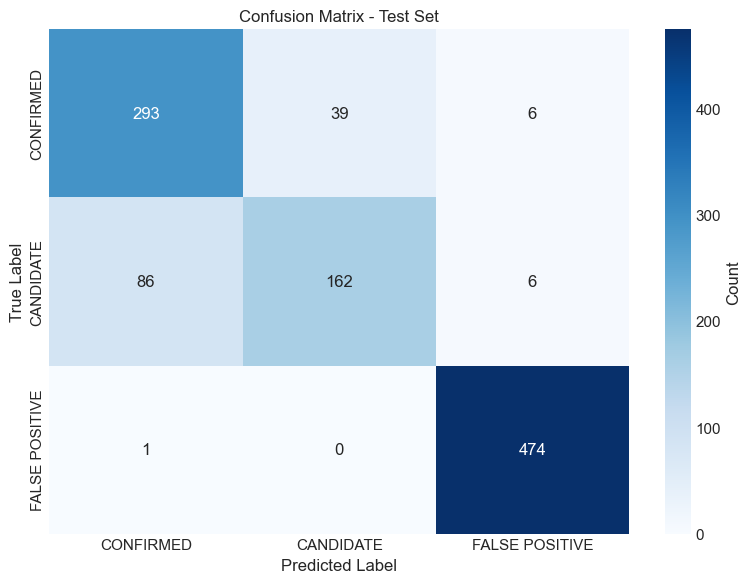

In [16]:
# ============================================================================
# PART 5: FINAL EVALUATION
# ============================================================================

def evaluate_model(model, model_type, use_scaled,
                  X_test, X_test_scaled, y_test, feature_cols):
    """
    Final test evaluation
    """
    print(f"\n{'='*70}")
    print("STEP 5: FINAL TEST EVALUATION")
    print(f"{'='*70}")
    
    # Predictions
    if use_scaled:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n📊 Test Set Metrics:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    # Classification report
    print(f"\n🔍 Detailed Report:")
    print("-" * 70)
    classes = ['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']
    print(classification_report(y_test, y_pred, target_names=classes))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n📈 Confusion Matrix:")
    print("-" * 70)
    print(f"                 Predicted")
    print(f"             Confirmed  Candidate  False Pos")
    print(f"Actual Confirmed    {cm[0,0]:5d}      {cm[0,1]:5d}      {cm[0,2]:5d}")
    print(f"       Candidate    {cm[1,0]:5d}      {cm[1,1]:5d}      {cm[1,2]:5d}")
    print(f"       False Pos    {cm[2,0]:5d}      {cm[2,1]:5d}      {cm[2,2]:5d}")
    
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=classes, yticklabels=classes, cbar_kws={'label': 'Count'})
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.set_title('Confusion Matrix - Test Set')
    plt.tight_layout()
    plt.show()
    
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'pred': y_pred, 'cm': cm}

# Step 5: Evaluate
if use_scaled:
    results = evaluate_model(model, model_type, use_scaled,
                            X_test, X_test_scaled, y_test, feature_cols)
else:
    results = evaluate_model(model, model_type, use_scaled,
                            X_test, X_test, y_test, feature_cols)

<h2 style="color:darkgreen; font-family:Verdana;">
6. Insights — Exoplanet Hope Story
</h2>
<hr style="border:1px solid darkgreen;"/>
<p style="font-family:Georgia; text-align:justify;">
The classification models we trained, simple as they are, offer a small glimpse into how data science can help us make sense of distant worlds. Each prediction—correct or not—is part of a larger effort to understand which strange dots of light might truly be planets.
</p>

<ul style="font-family:Georgia;">
<li><b>Most planets are difficult to confirm.</b> The dataset shows that “candidate” objects vastly outnumber confirmed planets, reflecting how demanding and delicate exoplanet detection truly is.</li>

<li><b>Complex patterns require flexible models.</b> Random Forest performed better than Logistic Regression, suggesting that the relationships in the data are not simple or linear—just like the physics behind these worlds.</li>

<li><b>Misclassifications teach us as much as correct predictions.</b> The confusion matrix reflects where the model hesitates, revealing overlaps between candidate signals and false positives. These are the same challenges astronomers face in real observations.</li>
</ul>

<p style="font-family:Georgia; text-align:justify;">
Together, the metrics and plots do not just rank models—they show how data and curiosity can bring distant possibilities into clearer focus. Even as beginners, we learned that every improvement in our tools helps us better understand where new worlds might be waiting.
</p>
